# 군집 알고리즘
*  타깃을 모르는 사진을 종류별로 분류하려 합니다. 
* 이렇게 타깃이 없을 때 사용하는 머신러닝 알고리즘이 비지도 학습(unsupervised learning)입니다. 
* 사람이 가르쳐 주지 않아도 데이터에 있는 무언가를 학습하기 때문입니다. 

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/6-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 과일 사진 데이터 준비하기

In [2]:
import numpy as np
import matplotlib.pyplot as plt

* npy 파일은 넘파이 파일입니다. 

In [3]:
fruits = np.load('fruits_300.npy')

In [4]:
print(fruits.shape)

(300, 100, 100)


* 이 배열의 첫 번째 차원(300)은 샘플의 개수를 나타내고, 두 번째 차원(100)은 이미지 높이, 세 번째 차원(100)은 이미지 너비입니다. 
* 이미지의 크기는 100 x 100입니다. 

In [5]:
print(fruits[0, 0, :])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


* matplotlib의 imshow() 함수를 사용하면 넘파일 배열로 저장된 이미지를 쉽게 그릴수 있습니다. 
* 흑백 이미지이므로 cmap 매개변수를 gray로 지정합니다. 

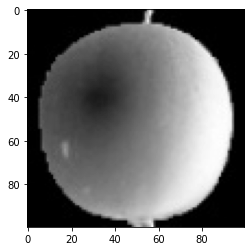

In [7]:
plt.imshow(fruits[0], cmap='gray')
plt.show()

* 흑백 샘플 이미지는 바탕이 밝고 물체가 짙은 색입니다. 
* 해당 이미지는 흑백 이미지로 찍은 이미지를 넘파이 배열로 변환할 때 반전시킨 것입니다. 

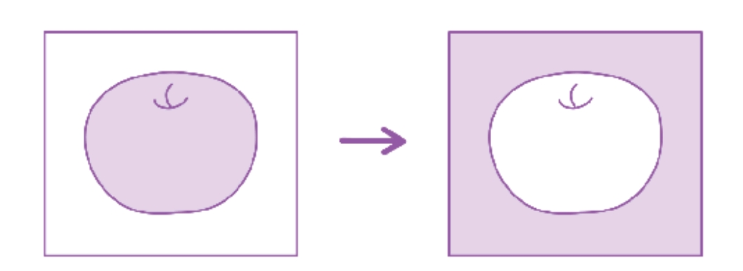

* cmap 매개변수를 gray_y로 지정하면 다시 반전합니다. 

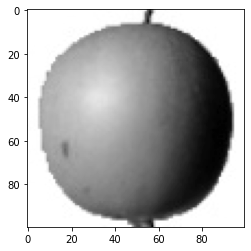

In [8]:
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

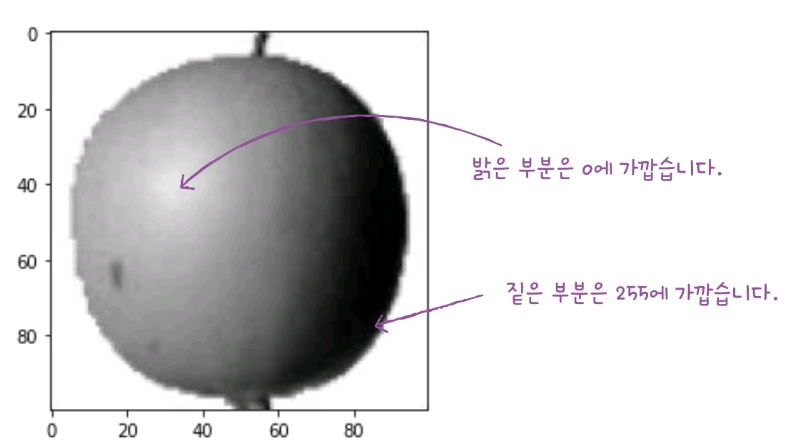

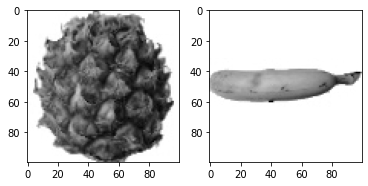

In [ ]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

## 픽셀 값 분석하기
* 과일 데이터를 사과, 파인애플, 바나나로 각각 나누어 보겠습니다. 
* 넘파일 배열을 나눌 때 100 x 100 이미지를 펼쳐서 길이가 10,000인 1차원 배열로 만들어보겠습니다. 
* 이렇게 펼치면 이미지로 출력하긴 어렵지만 배열을 계산할 때 편리합니다. 

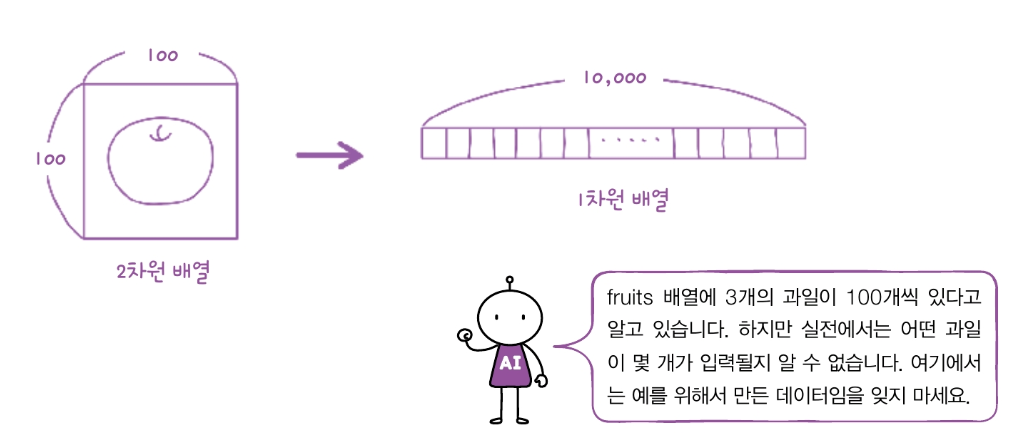

* reshape() 함수에서 첫번째 차원을 -1로 지정하여 자동으로 남은 차원을 할당하게 하였습니다. 

In [10]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

In [11]:
print(apple.shape)

(100, 10000)


* mean() 메서드의 axis=0으로 지정하면 행을 따라 계산하고 axis=1으로 지정하면 열을 따라 계산합니다. 

In [12]:
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


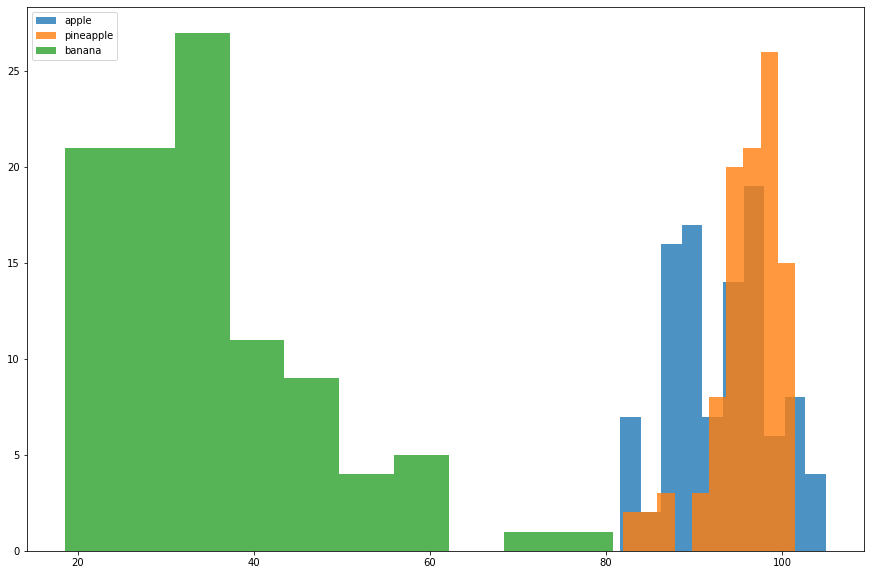

In [14]:
plt.figure(figsize=(15,10))
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

* 바나나 사진의 평균값은 40 아래에 집중되어 있는 점을 발견할 수 있습니다. 
* 사과와 파인애플은 90~100 사이에 많이 모여 있습니다. 
* 이 그림에서는 바나나는 픽셀의 값만으로 사과나 파인애플과 확실히 구분이 됩니다. 
* 바나나는 사진에서 차지하는 영역이 작기 때문에 평균값이 작습니다. 

----------
* 픽셀의 평균을 계산을 하여 시각화를 그려보겠습니다. 

In [16]:
apple.shape

(100, 10000)

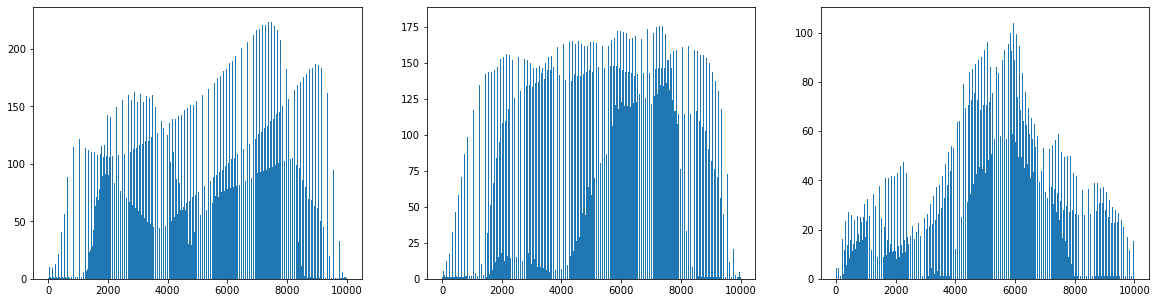

In [18]:
# 픽셀 10000개에 대한 평균값 
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

* 픽셀 평균값을 100 x 100 크기로 바꿔서 이미지처럼 출력하여 위 그래프와 비교하겠습니다. 
* 픽셀을 평균 낸 이미지를 모든 사진을 합쳐 놓은 대표 이미지로 생각할 수 있습니다. 

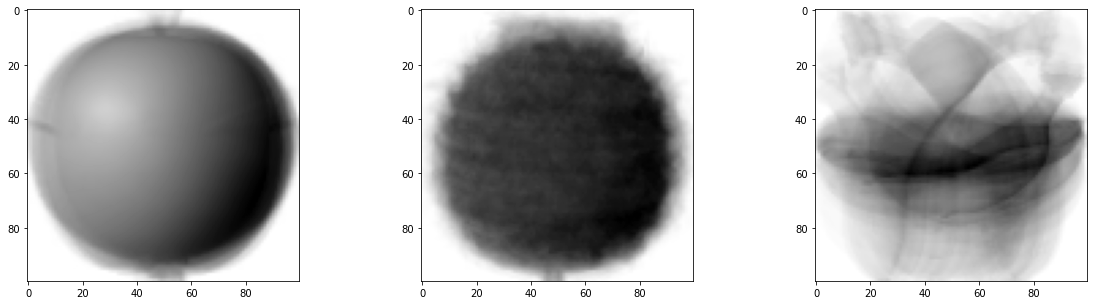

In [19]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

## 평균값과 가까운 사진 고르기
* 사과 사진의 평균값인 apple_mean와 가장 가까운 사진을 절댓값 오차를 사용하여 골라보겠습니다. 
* fruits 배열에 있는 모든 샘플에서 apple_mean을 뺀 절댓값의 평균을 계산하면 됩니다. 

In [20]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300,)


* np.argsort() 함수는 작은 것에서 큰 순서대로 나열한 abs_mean 배열의 인덱스를 반환합니다. 
* 반환된 값을 10 x 10 격자로 시각화를 하겠습니다. 

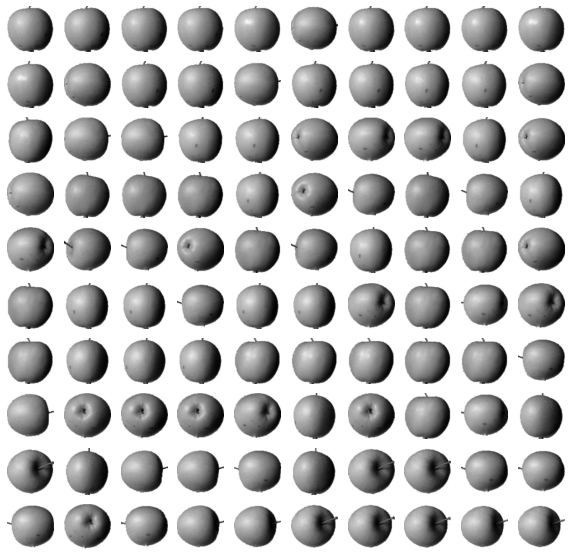

In [21]:
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

* 흑백 사진에 있는 픽셀값을 사용해 과일 사진을 모으는 작업을 진행했습니다. 이렇게 비슷한 샘플끼리 그룹으로 모으는 작업을 군집(clustering)이라고 합니다. 
* 대표적인 비지도 학습 작업 중 하나입니다. 
* 군집 알고리즘에서 만든 그룹을 클러스터(cluster)라고 부릅니다. 

## 확인문제
* 바나나 사진의 평균 banana_mean와 비슷한 사진 100장을 찾아 출력해보세요.

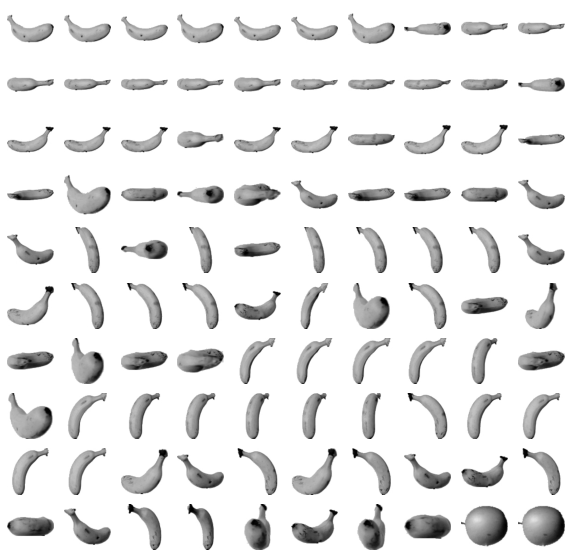

In [ ]:
abs_diff = np.abs(fruits - banana_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))

banana_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[banana_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()